# Credit card fraud detection pomoću RandomForest klasifikatora

In [1]:
from sklearn.datasets import make_blobs
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support

data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Skaliranje podataka:

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = data['Amount'].values
time_val = data['Time'].values

sns.distplot(time_val, ax=ax[0], color='black')
ax[0].set_title('Distribucija vremena transakcija', fontsize=14)
ax[0].set_xlim([min(time_val), max(time_val)])

sns.distplot(amount_val, ax=ax[1], color='red')
ax[1].set_title('Distribucija iznosa transakcija', fontsize=14)
ax[1].set_xlim([min(amount_val), max(amount_val)])





plt.show()


<Figure size 1800x400 with 2 Axes>

### Skaliram samo iznos, jer vrijeme prati dan/noć uzorak (manje transakcija po noći): 

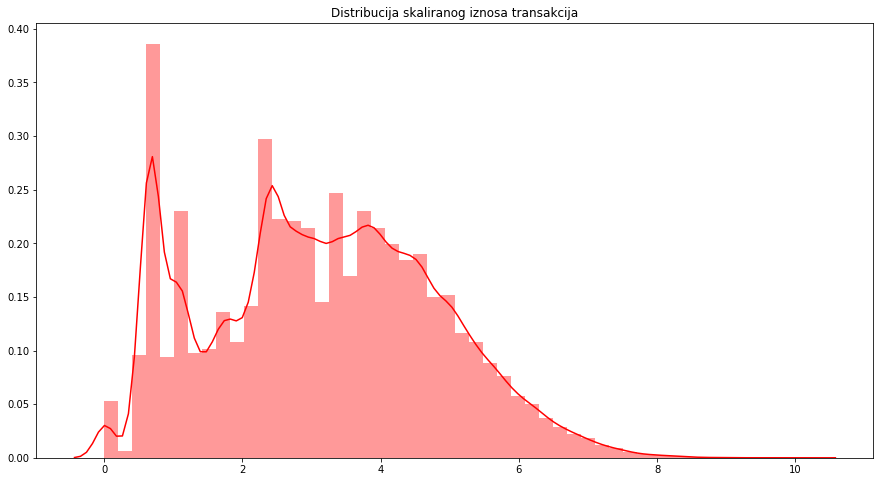

In [3]:
from sklearn.preprocessing import RobustScaler

scaled_amount = np.log(data['Amount']+1)
rob_scaler = RobustScaler()

data.drop(['Amount'], axis=1, inplace=True)
data['Amount'] = scaled_amount

plt.figure(figsize=(15,8))
scale_amount_val = data['Amount'].values
sns.distplot(scale_amount_val, color='r').set_title('Distribucija skaliranog iznosa transakcija')
plt.show()

In [4]:
sns.set()
%matplotlib inline
from sklearn.metrics import confusion_matrix


class_names = ['not_fraud', 'fraud']

def ConfMatrix(y_test, y_pred):
    matrix = confusion_matrix(y_test, y_pred)
    # Create pandas dataframe
    dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
    # Create heatmap
    sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
    plt.title("Confusion Matrix"), plt.tight_layout()
    plt.ylabel("True Class"), plt.xlabel("Predicted Class")
    plt.show()
    


def printstat(y_test,y_pred):
    prec,recall,f_score,_=precision_recall_fscore_support(y_test, y_pred, average='macro')
    print('Prec={:f}, Recall={:f}, f_score={:f}'.format(prec, recall, f_score))

In [5]:
features = ['V%d' % number for number in range(1, 29)] + ['Amount'] + ['Time']
X = data[features]
y = data['Class']
#list(y).count(1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


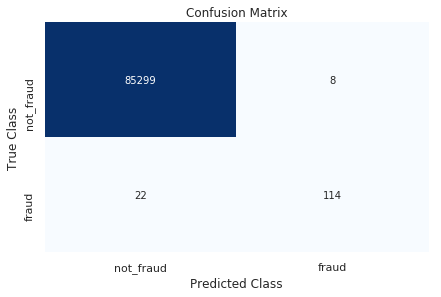

Prec=0.967084, Recall=0.919071, f_score=0.941773


In [6]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_jobs=-1)
rf_bazni_model=rf.fit(X_train,y_train)
y_pred=rf_bazni_model.predict(X_test)

ConfMatrix(y_test,y_pred)
printstat(y_test,y_pred)

# rezultati na random forest classifieru

# SADA ĆU NAPRAVIT SAMPLING DA VIDIMO REZULTATE:

#### Pogreškom sam prvo optimizirao hyperparametre na nebalansiranom setu podataka za random forest klasifikator, ali na sreću nisu baš beskorisni, mogu se ovdje iskoristit

In [7]:
# ovo su parametri koje sam dobio grid searchom
rf=RandomForestClassifier(  bootstrap = True,
                            max_depth = 90,
                            max_features = 3,
                            min_samples_leaf = 3,
                            min_samples_split = 8,
                            n_estimators = 100,
                            n_jobs = -1 )

SMOTE:
Prec=0.931561, Recall=0.941065, f_score=0.936261


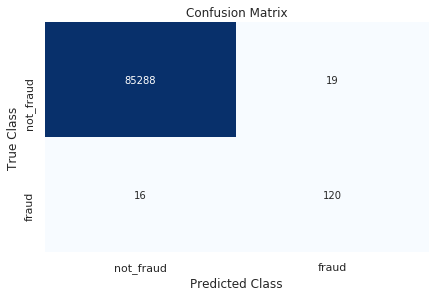

RUS:
Prec=0.547621, Recall=0.948990, f_score=0.582846


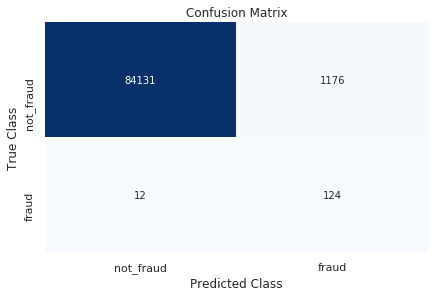

ROS:
Prec=0.959877, Recall=0.922736, f_score=0.940522


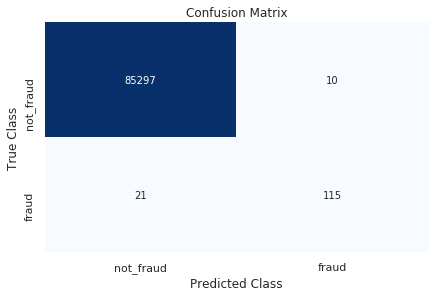

TOMEK LINKS:
Prec=0.962980, Recall=0.915388, f_score=0.937891


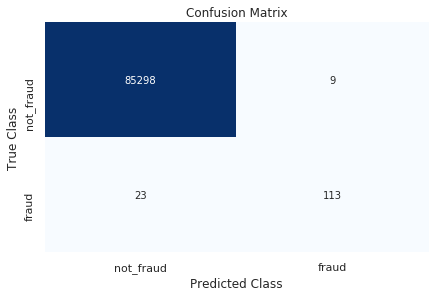

SMOTE ENN:
Prec=0.925968, Recall=0.944730, f_score=0.935146


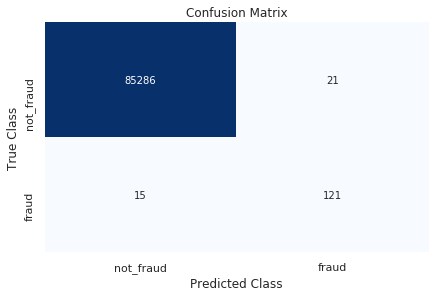

SMOTE TOMEK:
Prec=0.935164, Recall=0.944747, f_score=0.939903


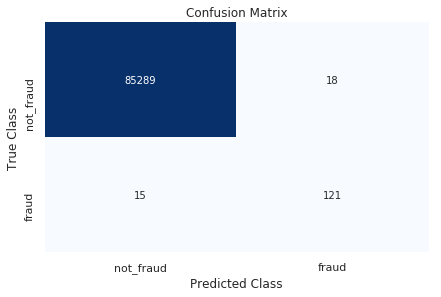

In [8]:

## SMOTE 

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X_smote_train, y_smote_train= smote.fit_sample(X_train, y_train)

rf.fit(X_smote_train,y_smote_train)
y_pred=rf.predict(X_test)
print('SMOTE:')
printstat(y_test,y_pred)
ConfMatrix(y_test, y_pred)

## RandomUnderSampler

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_rus_train, y_rus_train = rus.fit_sample(X_train, y_train)

rf.fit(X_rus_train,y_rus_train)
y_pred=rf.predict(X_test)
print('RUS:')
printstat(y_test,y_pred)
ConfMatrix(y_test, y_pred)

## RandomOverSampler

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_ros_train, y_ros_train = ros.fit_sample(X_train, y_train)

rf.fit(X_ros_train,y_ros_train)
y_pred=rf.predict(X_test)
print('ROS:')
printstat(y_test,y_pred)
ConfMatrix(y_test, y_pred)

## Tomek Links

from imblearn.under_sampling import TomekLinks
tomekl = TomekLinks(random_state=0,n_jobs=-1)
X_tomekl_train, y_tomekl_train = tomekl.fit_sample(X_train, y_train)

rf.fit(X_tomekl_train,y_tomekl_train)
y_pred=rf.predict(X_test)
print('TOMEK LINKS:')
printstat(y_test,y_pred)
ConfMatrix(y_test, y_pred)

## SMOTE ENN

from imblearn.combine import SMOTEENN
senn = SMOTEENN(random_state=0)
X_senn_train, y_senn_train = senn.fit_sample(X_train, y_train)

rf.fit(X_senn_train,y_senn_train)
y_pred=rf.predict(X_test)
print('SMOTE ENN:')
printstat(y_test,y_pred)
ConfMatrix(y_test, y_pred)

## SMOTE TOMEK

from imblearn.combine import SMOTETomek
stomek = SMOTETomek (random_state=0)
X_stomek_train, y_stomek_train = stomek.fit_sample(X_train, y_train)
print('SMOTE TOMEK:')
rf.fit(X_stomek_train,y_stomek_train)
y_pred=rf.predict(X_test)

printstat(y_test,y_pred)
ConfMatrix(y_test, y_pred)

# Traženje optimalnih hyperparametara pomoću exhaustive grid searcha:

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# n_estimators - broj stabala u rf
# max_features - broj featura koji se uzimaju u obzir pri odlučivanju u čvoru
# max_depth - dubina
# min_samples_split - minimalni broj uzoraka da se donese odluka u čvoru
# min_samples_leaf - minimalni broj uzoraka da se donese odluka u listu
# bootstrap - metoda odabira uzorka za trening svakog stabla


param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 500]
}


In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(rf, param_grid, cv = 3, n_jobs = 8, verbose = 100)

best = grid_search.fit(X_stomek_train, y_stomek_train)



Fitting 3 folds for each of 288 candidates, totalling 864 fits
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
Memmapping (shape=(397560, 30), dtype=float64) to new file /dev/shm/joblib_memmapping_folder_27460_5039403605/27460-139801998283664-26facdc576e1485a84418fe3200f250e.pkl
Memmapping (shape=(397560,), dtype=int64) to new file /dev/shm/joblib_memmapping_folder_27460_5039403605/27460-139801998283664-ec81efdf30a748b49e5337fc6c141f00.pkl
Memmapping (shape=(265040,), dtype=int64) to new file /dev/shm/joblib_memmapping_folder_27460_5039403605/27460-139801998283664-48d1d926e6fd49fb8ebe099dfe4d2b2e.pkl
Memmapping (shape=(132520,), dtype=int64) to new file /dev/shm/joblib_memmapping_folder_27460_5039403605/27460-139801998283664-b825324fefb842978e780c2f4bcb65e4.pkl
Memmapping (shape=(397560, 30), dtype=float64) to old file /dev/shm/joblib_memmapping_folder_27460_5039403605/27460-139801998283664-26facdc576e1485a84418fe3200f250e.pkl
Memmapping (shape=(397560,), dty

[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:  4.6min
Memmapping (shape=(397560, 30), dtype=float64) to old file /dev/shm/joblib_memmapping_folder_27460_5039403605/27460-139801998283664-26facdc576e1485a84418fe3200f250e.pkl
Memmapping (shape=(397560,), dtype=int64) to old file /dev/shm/joblib_memmapping_folder_27460_5039403605/27460-139801998283664-ec81efdf30a748b49e5337fc6c141f00.pkl
Memmapping (shape=(265040,), dtype=int64) to old file /dev/shm/joblib_memmapping_folder_27460_5039403605/27460-139801998283664-32c623c7e05042d2ab698609bb4b928a.pkl
Memmapping (shape=(132520,), dtype=int64) to old file /dev/shm/joblib_memmapping_folder_27460_5039403605/27460-139801998283664-5822bd6f36e7487fba606c6a9c7e0793.pkl
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:  5.7min
Memmapping (shape=(397560, 30), dtype=float64) to old file /dev/shm/joblib_memmapping_folder_27460_5039403605/27460-139801998283664-26facdc576e1485a84418fe3200f250e.pkl
Memmapping (shape=(397560,), dtype=int64) to old

In [ ]:
best.best_params_

In [ ]:
y_pred=best.predict(X_test)

ConfMatrix(y_test,y_pred)
printstat(y_test,y_pred)

In [ ]:
rf_opt=best


In [ ]:
rf_opt.fit(X_stomek_train,y_stomek_train)
y_pred=rf_opt.predict(X_test)

ConfMatrix(y_test,y_pred)
printstat(y_test,y_pred)

# Matrica korelacije:

In [ ]:
# stvaranje dataframea na balansiranom skupu za matricu korelacije 
newdata_X = pd.DataFrame(data=X_stomek_train,columns=X_train.columns)
newdata_Y = pd.DataFrame(data=y_stomek_train,columns=["Class"])
new_data = newdata_X
new_data["Class"] = newdata_Y["Class"]
#new_data.info()

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# nebalansirani skup podataka
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title('Matrica korelacije dobivena na nebalansiranom skupu podataka \n(nije dobra za odabir značajki)', 
              fontsize=14)

#balansirani skup podataka

sub_sample_corr = new_data.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('Matrica korelacije dobivena na balansiranom skupu podataka \n(pomoću nje odabremo značajke)', fontsize=14)
plt.show()

### pozitivna korelacija = "ako se jedna varijabla poveća ona s kojom je u pozitivnoj korelaciji će se isto povećat"
### negativna korelacija = "ako se jedna varijabla smanji ona s kojom je u negativnoj korelaciji će se povećat"
## Iznos korelacije je iz domene [-1,1]:
 ##    1.00 znači savršeni pozitivni utjecaj
 ##    0 da nema utjecaja
 ##   -1.00 savršeni negativni utjecaj

### Sa gornje matrice se vidi da su V14, V12, V10, V16 u negativnoj korelaciji sa Class - to znači što su te vrijednosti manje (bliže -1) da će transakcija vrlo vjerojatno biti Fraud.

### Također se vidi da su V11, V4, V2 i V19 u pozitivnoj korelaciji sa Class -  to znači što su te vrijednosti veće  (bliže 1) da će transakcija vrlo vjerojatno biti Fraud.

#### npr. V23 sudeći "golim okom" uopće ne utječe na transakciju

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))
colors = ["#0101DF", "#DF0101"]
# negativna korelacija s Class = "ako se V% smanji i Class će se povećat i vrlo vjerojratno biti Fraud"
sns.boxplot(x="Class", y="V14", data=new_data, palette=colors, ax=axes[0])
axes[0].set_title('V14 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V12", data=new_data, palette=colors, ax=axes[1])
axes[1].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_data, palette=colors, ax=axes[2])
axes[2].set_title('V10 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V16", data=new_data, palette=colors, ax=axes[3])
axes[3].set_title('V16 vs Class Negative Correlation')

plt.show()

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# pozitivna korelacija s Class = "ako se V% poveća i Class će se povećat i vrlo vjerojratno biti Fraud"
sns.boxplot(x="Class", y="V11", data=new_data, palette=colors, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_data, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=new_data, palette=colors, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=new_data, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()




# Outlier detection na oversampled datasetu:

### https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/

## Koristim IQR metodu opisanu na linku:

In [ ]:
v14_fraud = new_data['V14'].loc[new_data['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
v14_iqr = q75 - q25
v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
new_data = new_data.drop(new_data[(new_data['V14'] > v14_upper) | (new_data['V14'] < v14_lower)].index)

v12_fraud = new_data['V12'].loc[new_data['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25
v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
new_data = new_data.drop(new_data[(new_data['V12'] > v12_upper) | (new_data['V12'] < v12_lower)].index)

v10_fraud = new_data['V10'].loc[new_data['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25
v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
new_data = new_data.drop(new_data[(new_data['V10'] > v10_upper) | (new_data['V10'] < v10_lower)].index)

v16_fraud = new_data['V16'].loc[new_data['Class'] == 1].values
q25, q75 = np.percentile(v16_fraud, 25), np.percentile(v16_fraud, 75)
v16_iqr = q75 - q25
v16_cut_off = v16_iqr * 1.5
v16_lower, v16_upper = q25 - v16_cut_off, q75 + v16_cut_off
outliers = [x for x in v16_fraud if x < v16_lower or x > v16_upper]
new_data = new_data.drop(new_data[(new_data['V16'] > v16_upper) | (new_data['V16'] < v16_lower)].index)


v11_fraud = new_data['V11'].loc[new_data['Class'] == 1].values
q25, q75 = np.percentile(v11_fraud, 25), np.percentile(v11_fraud, 75)
v11_iqr = q75 - q25
v11_cut_off = v11_iqr * 1.5
v11_lower, v11_upper = q25 - v11_cut_off, q75 + v11_cut_off
outliers = [x for x in v11_fraud if x < v11_lower or x > v11_upper]
new_data = new_data.drop(new_data[(new_data['V11'] > v11_upper) | (new_data['V11'] < v11_lower)].index)

v4_fraud = new_data['V4'].loc[new_data['Class'] == 1].values
q25, q75 = np.percentile(v4_fraud, 25), np.percentile(v4_fraud, 75)
v4_iqr = q75 - q25
v4_cut_off = v4_iqr * 1.5
v4_lower, v4_upper = q25 - v4_cut_off, q75 + v4_cut_off
outliers = [x for x in v4_fraud if x < v4_lower or x > v4_upper]
new_data = new_data.drop(new_data[(new_data['V4'] > v4_upper) | (new_data['V4'] < v4_lower)].index)

v2_fraud = new_data['V2'].loc[new_data['Class'] == 1].values
q25, q75 = np.percentile(v2_fraud, 25), np.percentile(v2_fraud, 75)
v2_iqr = q75 - q25
v2_cut_off = v2_iqr * 1.5
v2_lower, v2_upper = q25 - v2_cut_off, q75 + v2_cut_off
outliers = [x for x in v2_fraud if x < v2_lower or x > v2_upper]
new_data = new_data.drop(new_data[(new_data['V2'] > v2_upper) | (new_data['V2'] < v2_lower)].index)

v19_fraud = new_data['V19'].loc[new_data['Class'] == 1].values
q25, q75 = np.percentile(v19_fraud, 25), np.percentile(v19_fraud, 75)
v19_iqr = q75 - q25
v19_cut_off = v19_iqr * 1.5
v19_lower, v19_upper = q25 - v19_cut_off, q75 + v19_cut_off
outliers = [x for x in v19_fraud if x < v19_lower or x > v19_upper]
new_data = new_data.drop(new_data[(new_data['V19'] > v19_upper) | (new_data['V19'] < v19_lower)].index)

## Test na pročišćenom datasetu:

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
nX = new_data.drop('Class', axis=1)
ny = new_data['Class']

#nX_train, nX_test, ny_train, ny_test = train_test_split(X, y, test_size=0.3, random_state=42)

#scoring = {'precision' : make_scorer(precision_score),
 #          'recall' : make_scorer(recall_score), 
  #         'f1_score' : make_scorer(f1_score)}

#skfold = StratifiedKFold(n_splits=5, random_state=42)
#results = cross_validate(rf_opt,nX,ny,cv=skfold,scoring=scoring)


#ako ga pokrenem na kross validaciji ne dobijem dobre rezultate, tj. dobijem preko 99 posto sve scorove


In [ ]:
#results

In [ ]:
#print(np.mean(results['precision']))
#print(np.mean(results['recall']))
#print(np.mean(results['f1_score']))

In [ ]:
# rezultati bez cv
# nije moguće preklapanje jer smo oversamplali xtrain i ytrain 
rf_opt.fit(nX, ny)
y_pred = rf_opt.predict(X_test)


ConfMatrix(y_test,y_pred)
printstat(y_test,y_pred)

# Prikaz najvažnijih značajki pomoću (optimalnog) RF klasifikatora:

In [ ]:
importances = rf_opt.feature_importances_
indices = np.argsort(importances)[::-1]

In [ ]:
plt.figure(figsize=(10,8))

plt.plot(range(X_train.shape[1]), importances[indices], 'o', color='red')
plt.ylabel('važnost značajke')
plt.xlim([-1, X_train.shape[1]])
plt.xticks(range(X_train.shape[1]), X_train.columns.values[indices], rotation=90)
plt.tight_layout()
plt.grid(True,linestyle='--')
plt.show()